# Convolutional Neural Network

Necessary steps to conduct preprocessing, and then define, train, and test a convolutional neural network model on image data.

## Resources

The below links contain interesting information related to classify the Fashion-MNIST dataset:
* https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a
* https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb
* https://www.kaggle.com/anebzt/fashion-mnist-in-keras
* https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/
* https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

* https://github.com/SocieteGenevoiseDonnees/FiltersStylesDomains
* https://towardsdatascience.com/object-detection-using-yolov3-using-keras-80bf35e61ce1
* https://github.com/learncsds/Keras-ML-DL-DeepLizard

## Objects Detection Systems

* [Yolo3](https://pjreddie.com/darknet/yolo/)

## Sample Example

The data consists of images of clothing.

Now, lets begin by loading some of the required packages:

In [8]:
import numpy as np

import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt

import keras

from keras.utils import to_categorical
# Eithe Keras or Sklearn function can be used for one-hot encodong
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

%matplotlib inline


import warnings                      # Following section is throwing a tone of warnings due to 
warnings.filterwarnings('ignore')    # versions mismatch in current system, therefore ignoring

### Load the Dataset

The two distinct datasets are loaded; one for training and one for testing. These are stored in the corresponding training and testing sets.

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

A dictionary key is defined below with the corresponding class name for each of the integer encoded values in y_train and y_test.

In [4]:
key = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",
       5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

## Applying and Training Model

### Datasets

* Exhaustive List: https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research#Object_detection_and_recognition
* ImageNet: http://www.image-net.org/
* Downsampled ImageNet: http://image-net.org/small/download.php
* CIFAR: https://www.cs.toronto.edu/~kriz/cifar.html


### Resources

* https://medium.com/coinmonks/how-to-get-images-from-imagenet-with-python-in-google-colaboratory-aeef5c1c45e5
* https://blog.goodaudience.com/train-a-keras-neural-network-with-imagenet-synsets-in-google-colaboratory-e68dc4fd759f
* https://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/

### Process

The process to train model from external datasets is to download the dataset and place in corresponding directories before performing the trainng itself.

Another potential solution is to use a pretrained model.

## Transfer Learning

### Load and evaluate a saved model

In [5]:
from numpy import loadtxt
from keras.models import load_model
import zipfile

# Extract zip archive
with zipfile.ZipFile('cats_dogs_tlearn_basic_cnn.h5.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load model
model = load_model('cats_dogs_tlearn_basic_cnn.h5')
model.name = 'cats_dogs_tlearn_basic_cnn'

# Summarize model.
model.summary()

Model: "cats_dogs_tlearn_basic_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [6]:
# https://towardsdatascience.com/object-detection-using-yolov3-using-keras-80bf35e61ce1

from numpy import expand_dims

from keras.layers.merge import add, concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45

def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size

    # load the image with the required size
    image = load_img(filename, target_size=shape) # convert to numpy array
    image = img_to_array(image)

    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0

    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height


# define our new image
photo_filename = '../tests/cat_01.jpg'

# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (net_w, net_w))

# make prediction
#yolos = model.predict(image)

# summarize the shape of the list of arrays
#print([a.shape for a in yolos])
#draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

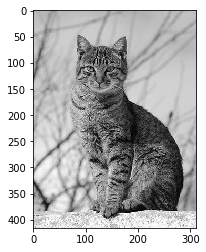

(416, 312)

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

def resize_picture(infile, outfile, file_ext="JPEG", width=128, height=128):
    im=None
    success=False
    try:
        with Image.open(infile) as im:
            size = (int(width), int(height))
            im.thumbnail(size, Image.ANTIALIAS)
            im.save(outfile, file_ext)
        success=True
    finally:
        return success

infile = photo_filename
outfile = "temp.jpg"
resize_picture(infile, outfile, width=416, height=416)

image = mpimg.imread(outfile)
image = np.dot(image[...,:3], [0.299, 0.587, 0.114])
plt.imshow(image, cmap="gray")
plt.show()

image.shape

In [15]:
yolos = model.predict(image)

ValueError: Error when checking input: expected input_2 to have shape (8192,) but got array with shape (312,)